In [320]:
#IMPORTING THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib
import seaborn as sns 



In [321]:
#IMPORTING THE DATASET
df=pd.read_csv("final_dataset.csv")

In [322]:
df.head(5)
#df.Medium.value_counts()

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,MHRDName,...,CA_3,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType
0,318192,1101776,KVY1,O,87.0,39.0,82.0,89.0,88.0,Bachelor of Science (Honours) (Agriculture),...,1.0,0.0,181,65,Hostler,North,Female,Hindi,Theory,UG
1,318192,1101776,KVY147,A+,87.0,47.0,65.0,85.0,82.0,Bachelor of Science (Honours) (Agriculture),...,0.0,1.0,181,65,Hostler,North,Female,Hindi,Theory,UG
2,318192,1101776,KVY148,B+,84.0,29.0,63.0,77.0,76.0,Bachelor of Science (Honours) (Agriculture),...,3.0,5.0,181,65,Hostler,North,Female,Hindi,Theory,UG
3,318192,1101776,KVY2,A+,NaN,NaN,NaN,82.0,74.0,Bachelor of Science (Honours) (Agriculture),...,NaN,NaN,181,65,Hostler,North,Female,Hindi,Practical,UG
4,318192,1101776,KVY3,A+,87.0,34.0,68.0,89.0,76.0,Bachelor of Science (Honours) (Agriculture),...,2.0,17.0,181,65,Hostler,North,Female,Hindi,Theory,UG


In [323]:
df["MHRDName"].value_counts().head()

Bachelor of Science (Honours) (Agriculture)                                                     7707
Bachelor of Technology in Computer Science and Engineering (Big Data)                           5493
Bachelor of Technology (Computer Science and Engineering)                                       4900
Bachelor of Technology in Computer Science and Engineering (Android Application Development)    4324
Bachelor of Technology in Electronics and Communication Engineering (Internet of Things)        3917
Name: MHRDName, dtype: int64

## SELECTING DATA FROM DATASET

In [324]:
###Only rows are selected where MHRDName == Integrated Bachelor of Technology - Master of Technology (Civil Engineering)


df = df[df['MHRDName'] == 'Integrated Bachelor of Technology - Master of Technology (Civil Engineering)']
print("Rows of MHRDName = Integrated Bachelor of Technology - Master of Technology (Civil Engineering):",df.shape[0])
df = df.drop('MHRDName',axis=1)

Rows of MHRDName = Integrated Bachelor of Technology - Master of Technology (Civil Engineering): 56


In [387]:
df.shape

(56, 22)




## __Handling the missing values__

In [389]:
df["CA_100"].fillna(value=0,axis=0,inplace=True)


In [390]:
df["MTT_50"].fillna(value=0,axis=0,inplace=True)



In [391]:
df["ETT_100"].fillna(value=0,axis=0,inplace=True)



In [392]:
df["ETP_100"].fillna(value=0,axis=0,inplace=True)



In [393]:
df["Course_Att"].fillna(value=0,axis=0,inplace=True)



In [394]:
df.isnull().sum()

index          0
Termid         0
Regd No        0
Course         0
Grade          0
CA_100         0
MTT_50         0
ETT_100        0
ETP_100        0
Course_Att     0
CA_1           0
CA_2           0
CA_3           0
CA_4           0
Height         0
Weight         0
ScholarType    0
Direction      0
Gender         0
Medium         0
CourseType     0
ProgramType    0
dtype: int64

In [395]:
df["CA_1"].fillna(value=0,axis=0,inplace=True)

In [396]:

df["CA_2"].fillna(value=0,axis=0,inplace=True)

In [397]:
df["CA_3"].fillna(value=0,axis=0,inplace=True)

In [398]:
df["CA_4"].fillna(value=0,axis=0,inplace=True)

In [399]:
df.isnull().sum()

index          0
Termid         0
Regd No        0
Course         0
Grade          0
CA_100         0
MTT_50         0
ETT_100        0
ETP_100        0
Course_Att     0
CA_1           0
CA_2           0
CA_3           0
CA_4           0
Height         0
Weight         0
ScholarType    0
Direction      0
Gender         0
Medium         0
CourseType     0
ProgramType    0
dtype: int64

In [338]:
#Course        
#Grade

In [400]:
df['Grade'].value_counts().head(6)

0    19
3    13
1    12
8     3
2     3
6     2
Name: Grade, dtype: int64

In [401]:
df['Course'].value_counts().head(5)

3    10
4     4
5     3
6     3
7     3
Name: Course, dtype: int64

In [402]:
df["Grade"].head(8)

0    0
1    3
2    0
3    1
4    3
5    0
6    0
7    3
Name: Grade, dtype: int64

In [403]:
df["Course"].head(8)

0     3
1     3
2     3
3     1
4     2
5     4
6     9
7    10
Name: Course, dtype: int64

## Label Encoder to convert values into numerical values

In [404]:
from sklearn.preprocessing import LabelEncoder

In [405]:

ss=LabelEncoder()

In [406]:
df["Grade"]=ss.fit_transform(df["Grade"])
Gradelen=len(df['Grade'].unique())

In [407]:
df.Grade.head(20)

0     0
1     3
2     0
3     1
4     3
5     0
6     0
7     3
8     0
9     0
10    1
11    8
12    3
13    3
14    3
15    5
16    6
17    2
18    3
19    2
Name: Grade, dtype: int64

In [352]:
df["Course"]=ss.fit_transform(df["Course"])

In [353]:
df[["Course"]].head(8)

,Course
17,3
821,3
3375,3
4544,1
4545,2
4546,4
4547,9
4548,10


In [354]:
df.head(4)

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,CA_1,...,CA_3,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType
17,518192,1105776,3,0,89.0,0.0,0.0,64.0,0.0,62.0,...,4.0,18.0,155,75,Hostler,North,Female,Regional,Theory,UG
821,518192,1326776,3,3,71.0,0.0,0.0,72.0,0.0,54.0,...,3.0,0.0,170,65,Hostler,South,Female,Regional,Theory,UG
3375,518192,1945776,3,0,87.0,0.0,0.0,63.0,0.0,24.0,...,20.0,20.0,166,97,Hostler,South,Male,English,Theory,UG
4544,418192,2199776,1,1,88.0,43.0,72.0,0.0,84.0,58.0,...,1.0,13.0,162,45,Day Scholar,South,Female,English,Theory,UG


In [355]:
df.columns

Index(['Termid', 'Regd No', 'Course', 'Grade', 'CA_100', 'MTT_50', 'ETT_100',
       'ETP_100', 'Course_Att', 'CA_1', 'CA_2', 'CA_3', 'CA_4', 'Height',
       'Weight', 'ScholarType', 'Direction', 'Gender', 'Medium', 'CourseType',
       'ProgramType'],
      dtype='object')

In [356]:
df["ScholarType"]=ss.fit_transform(df["ScholarType"])

In [357]:
df["Direction"]=ss.fit_transform(df["Direction"])

In [358]:
df["Gender"]=ss.fit_transform(df["Gender"])

In [359]:
df["Medium"]=ss.fit_transform(df["Medium"])

In [360]:
df["CourseType"]=ss.fit_transform(df["CourseType"])

In [361]:
df["ProgramType"]=ss.fit_transform(df["ProgramType"])

In [362]:
df.head(4)

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,CA_1,...,CA_3,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType
17,518192,1105776,3,0,89.0,0.0,0.0,64.0,0.0,62.0,...,4.0,18.0,155,75,1,1,0,2,0,0
821,518192,1326776,3,3,71.0,0.0,0.0,72.0,0.0,54.0,...,3.0,0.0,170,65,1,2,0,2,0,0
3375,518192,1945776,3,0,87.0,0.0,0.0,63.0,0.0,24.0,...,20.0,20.0,166,97,1,2,1,0,0,0
4544,418192,2199776,1,1,88.0,43.0,72.0,0.0,84.0,58.0,...,1.0,13.0,162,45,0,2,0,0,0,0


In [363]:
df.Direction.value_counts()

1    22
3    12
2    11
0    11
Name: Direction, dtype: int64

In [364]:
df.CourseType.value_counts()

0    56
Name: CourseType, dtype: int64

In [365]:
df.ProgramType.value_counts()

0    56
Name: ProgramType, dtype: int64

In [366]:
df.head(5)

,Termid,Regd No,Course,Grade,CA_100,MTT_50,ETT_100,ETP_100,Course_Att,CA_1,...,CA_3,CA_4,Height,Weight,ScholarType,Direction,Gender,Medium,CourseType,ProgramType
17,518192,1105776,3,0,89.0,0.0,0.0,64.0,0.0,62.0,...,4.0,18.0,155,75,1,1,0,2,0,0
821,518192,1326776,3,3,71.0,0.0,0.0,72.0,0.0,54.0,...,3.0,0.0,170,65,1,2,0,2,0,0
3375,518192,1945776,3,0,87.0,0.0,0.0,63.0,0.0,24.0,...,20.0,20.0,166,97,1,2,1,0,0,0
4544,418192,2199776,1,1,88.0,43.0,72.0,0.0,84.0,58.0,...,1.0,13.0,162,45,0,2,0,0,0,0
4545,418192,2199776,2,3,71.0,30.0,59.0,0.0,88.0,55.0,...,6.0,2.0,162,45,0,2,0,0,0,0


In [367]:
df.columns

Index(['Termid', 'Regd No', 'Course', 'Grade', 'CA_100', 'MTT_50', 'ETT_100',
       'ETP_100', 'Course_Att', 'CA_1', 'CA_2', 'CA_3', 'CA_4', 'Height',
       'Weight', 'ScholarType', 'Direction', 'Gender', 'Medium', 'CourseType',
       'ProgramType'],
      dtype='object')

## Data visualization

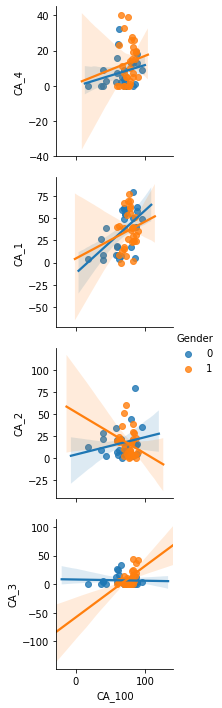

In [368]:

sns.pairplot( data=df,
   hue='Gender',
    palette=None,
    x_vars=["CA_100"],
    y_vars=["CA_4",'CA_1', 'CA_2', 'CA_3'],
    #size=6,
    kind="reg",)
plt.show()


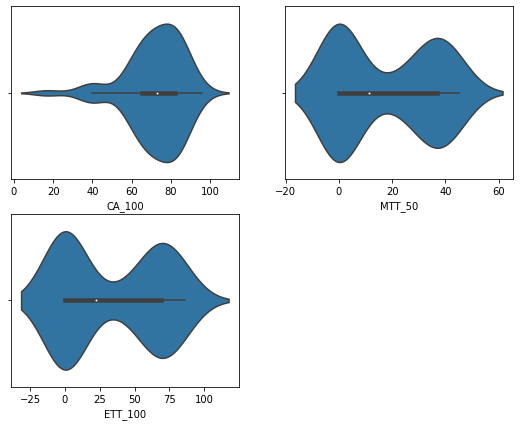

In [369]:
plt.figure(figsize=(9,7))
plt.subplot(2,2,1)
sns.violinplot(df['CA_100'])
plt.subplot(2,2,2)
sns.violinplot(df['MTT_50'])
plt.subplot(2,2,3)
sns.violinplot(df['ETT_100'])





# #outliers


In [370]:
df.columns

Index(['Termid', 'Regd No', 'Course', 'Grade', 'CA_100', 'MTT_50', 'ETT_100',
       'ETP_100', 'Course_Att', 'CA_1', 'CA_2', 'CA_3', 'CA_4', 'Height',
       'Weight', 'ScholarType', 'Direction', 'Gender', 'Medium', 'CourseType',
       'ProgramType'],
      dtype='object')

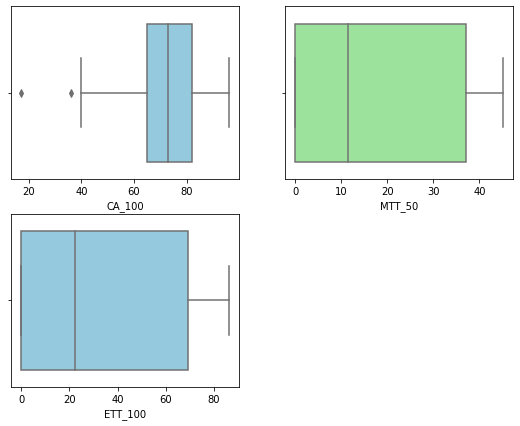

In [371]:
plt.figure(figsize=(9,7))
plt.subplot(2,2,1)
sns.boxplot(df.CA_100,color="skyblue")
plt.subplot(2,2,2)
sns.boxplot(df['MTT_50'],color="lightgreen")
plt.subplot(2,2,3)
sns.boxplot(df['ETT_100'],color="skyblue")

In [372]:
##  NO outliers is present 

## Heatmap(for seeing the correlation )

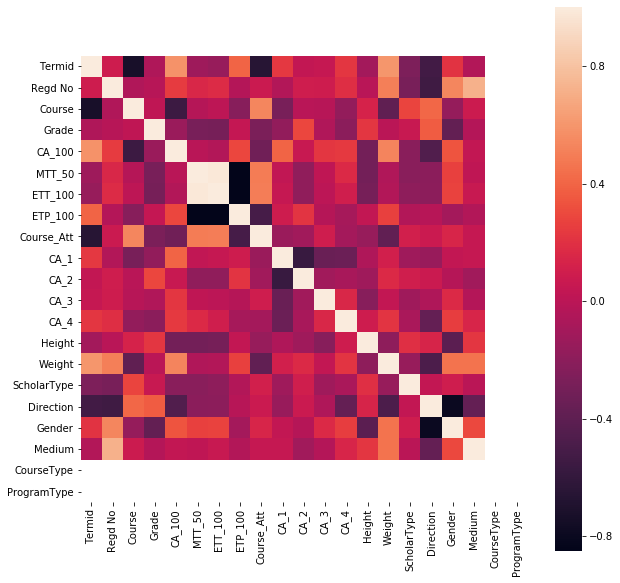

In [373]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), square= True)

In [374]:
#courseType with ca_100 and exams marks are showing some correlation

In [375]:
df.reset_index(inplace=True)

In [376]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 22 columns):
index          56 non-null int64
Termid         56 non-null int64
Regd No        56 non-null int64
Course         56 non-null int64
Grade          56 non-null int64
CA_100         56 non-null float64
MTT_50         56 non-null float64
ETT_100        56 non-null float64
ETP_100        56 non-null float64
Course_Att     56 non-null float64
CA_1           56 non-null float64
CA_2           56 non-null float64
CA_3           56 non-null float64
CA_4           56 non-null float64
Height         56 non-null int64
Weight         56 non-null int64
ScholarType    56 non-null int32
Direction      56 non-null int32
Gender         56 non-null int32
Medium         56 non-null int32
CourseType     56 non-null int32
ProgramType    56 non-null int32
dtypes: float64(9), int32(6), int64(7)
memory usage: 8.4 KB


In [377]:
df.shape

(56, 22)

In [378]:
df.columns

Index(['index', 'Termid', 'Regd No', 'Course', 'Grade', 'CA_100', 'MTT_50',
       'ETT_100', 'ETP_100', 'Course_Att', 'CA_1', 'CA_2', 'CA_3', 'CA_4',
       'Height', 'Weight', 'ScholarType', 'Direction', 'Gender', 'Medium',
       'CourseType', 'ProgramType'],
      dtype='object')

In [379]:
kmeans_df = df.copy()
kmeans_df = df.drop(['Regd No','Grade'],axis=1)

## Elbow Method 

636189064403426.5
71285885803293.75
37931288152989.64
10776431899720.572
3487059228653.3535
1980830907869.349
1092612021225.2806
662569751172.3367
373335450968.4034


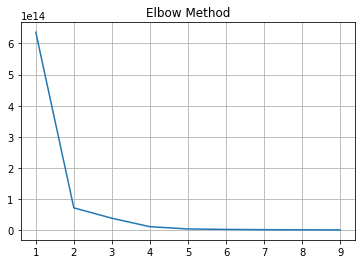

In [408]:
#elbow method

distortion=[]

for i in range(1,10,1):
    km=KMeans(n_clusters=i)
    y_km=km.fit_predict(df)
    distortion.append(km.inertia_)
    print(km.inertia_)

a=np.arange(1,10,1)
plt.plot(a,distortion)
plt.grid()
plt.title('Elbow Method')
plt.show()

In [380]:
print("Columns in KMeans data input\n",kmeans_df.columns.values)
c = ['red','blue','green','yellow','orange','black','indigo']
distortion=[]

Columns in KMeans data input
 ['index' 'Termid' 'Course' 'CA_100' 'MTT_50' 'ETT_100' 'ETP_100'
 'Course_Att' 'CA_1' 'CA_2' 'CA_3' 'CA_4' 'Height' 'Weight' 'ScholarType'
 'Direction' 'Gender' 'Medium' 'CourseType' 'ProgramType']


## Applying the Kmeans

Centers [[2.26132222e+04 4.40414222e+05 8.17777778e+00 7.63111111e+01
  2.00000000e+01 3.78444444e+01 3.30444444e+01 5.92666667e+01
  3.85111111e+01 1.60666667e+01 9.51111111e+00 1.22222222e+01
  1.60711111e+02 6.24222222e+01 5.33333333e-01 1.04444444e+00
  6.66666667e-01 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.27380000e+04 3.18192000e+05 2.04545455e+01 5.26363636e+01
  8.81818182e+00 1.96363636e+01 2.13636364e+01 8.37272727e+01
  2.30909091e+01 1.90909091e+01 6.00000000e+00 4.45454545e+00
  1.69000000e+02 4.40000000e+01 1.00000000e+00 3.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]]
Silhouette score for 2 cluster = 0.6969112216047011


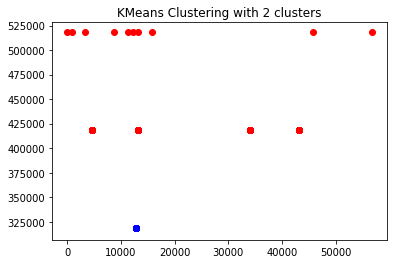

Centers [[ 2.42648286e+04  4.18192000e+05  9.65714286e+00  7.51142857e+01
   2.57142857e+01  4.86571429e+01  2.27428571e+01  7.62000000e+01
   3.82285714e+01  1.45714286e+01  1.00285714e+01  1.22857143e+01
   1.58914286e+02  5.96571429e+01  5.14285714e-01  9.71428571e-01
   7.71428571e-01  1.02857143e+00  0.00000000e+00  0.00000000e+00]
 [ 1.27380000e+04  3.18192000e+05  2.04545455e+01  5.26363636e+01
   8.81818182e+00  1.96363636e+01  2.13636364e+01  8.37272727e+01
   2.30909091e+01  1.90909091e+01  6.00000000e+00  4.45454545e+00
   1.69000000e+02  4.40000000e+01  1.00000000e+00  3.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.68326000e+04  5.18192000e+05  3.00000000e+00  8.05000000e+01
   3.55271368e-15 -7.10542736e-15  6.91000000e+01  0.00000000e+00
   3.95000000e+01  2.13000000e+01  7.70000000e+00  1.20000000e+01
   1.67000000e+02  7.21000000e+01  6.00000000e-01  1.30000000e+00
   3.00000000e-01  9.00000000e-01  0.00000000e+00  0.00000000e+00]

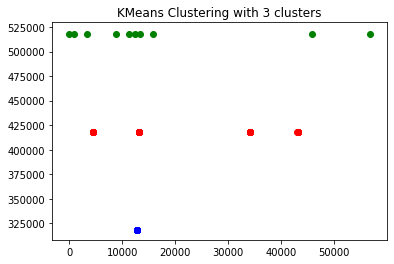

Centers [[ 9.08641176e+03  4.18192000e+05  9.05882353e+00  7.38235294e+01
   2.58823529e+01  4.73529412e+01  2.31764706e+01  7.57058824e+01
   3.87058824e+01  1.57058824e+01  1.01764706e+01  9.23529412e+00
   1.56176471e+02  4.92352941e+01  5.29411765e-01  1.47058824e+00
   5.29411765e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.27380000e+04  3.18192000e+05  2.04545455e+01  5.26363636e+01
   8.81818182e+00  1.96363636e+01  2.13636364e+01  8.37272727e+01
   2.30909091e+01  1.90909091e+01  6.00000000e+00  4.45454545e+00
   1.69000000e+02  4.40000000e+01  1.00000000e+00  3.00000000e+00
   0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.68326000e+04  5.18192000e+05  3.00000000e+00  8.05000000e+01
   3.55271368e-15 -7.10542736e-15  6.91000000e+01  0.00000000e+00
   3.95000000e+01  2.13000000e+01  7.70000000e+00  1.20000000e+01
   1.67000000e+02  7.21000000e+01  6.00000000e-01  1.30000000e+00
   3.00000000e-01  9.00000000e-01  0.00000000e+00  0.00000000e+00]

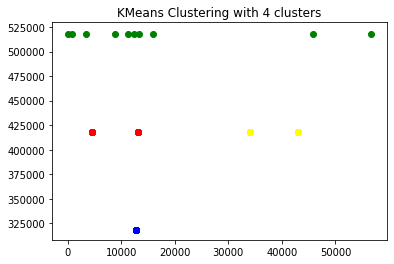

Centers [[9.08641176e+03 4.18192000e+05 9.05882353e+00 7.38235294e+01
  2.58823529e+01 4.73529412e+01 2.31764706e+01 7.57058824e+01
  3.87058824e+01 1.57058824e+01 1.01764706e+01 9.23529412e+00
  1.56176471e+02 4.92352941e+01 5.29411765e-01 1.47058824e+00
  5.29411765e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.27380000e+04 3.18192000e+05 2.04545455e+01 5.26363636e+01
  8.81818182e+00 1.96363636e+01 2.13636364e+01 8.37272727e+01
  2.30909091e+01 1.90909091e+01 6.00000000e+00 4.45454545e+00
  1.69000000e+02 4.40000000e+01 1.00000000e+00 3.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.22862500e+03 5.18192000e+05 3.00000000e+00 7.90000000e+01
  0.00000000e+00 0.00000000e+00 6.73750000e+01 0.00000000e+00
  4.37500000e+01 1.48750000e+01 7.87500000e+00 1.25000000e+01
  1.65625000e+02 7.28750000e+01 7.50000000e-01 1.37500000e+00
  3.75000000e-01 8.75000000e-01 0.00000000e+00 0.00000000e+00]
 [3.86000000e+04 4.18192000e+05 1.02222222e+01 7.63333333e+

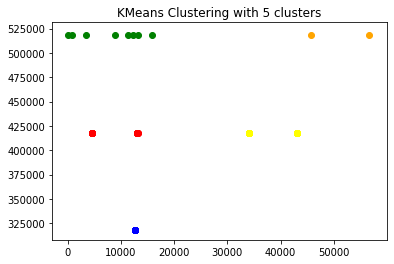

Centers [[4.30810000e+04 4.18192000e+05 1.02222222e+01 7.91111111e+01
  2.75555556e+01 5.40000000e+01 2.72222222e+01 7.13333333e+01
  4.06666667e+01 1.44444444e+01 1.26666667e+01 1.13333333e+01
  1.55000000e+02 7.60000000e+01 0.00000000e+00 1.00000000e+00
  1.00000000e+00 2.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.27380000e+04 3.18192000e+05 2.04545455e+01 5.26363636e+01
  8.81818182e+00 1.96363636e+01 2.13636364e+01 8.37272727e+01
  2.30909091e+01 1.90909091e+01 6.00000000e+00 4.45454545e+00
  1.69000000e+02 4.40000000e+01 1.00000000e+00 3.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.22862500e+03 5.18192000e+05 3.00000000e+00 7.90000000e+01
  0.00000000e+00 0.00000000e+00 6.73750000e+01 0.00000000e+00
  4.37500000e+01 1.48750000e+01 7.87500000e+00 1.25000000e+01
  1.65625000e+02 7.28750000e+01 7.50000000e-01 1.37500000e+00
  3.75000000e-01 8.75000000e-01 0.00000000e+00 0.00000000e+00]
 [9.08641176e+03 4.18192000e+05 9.05882353e+00 7.38235294e+

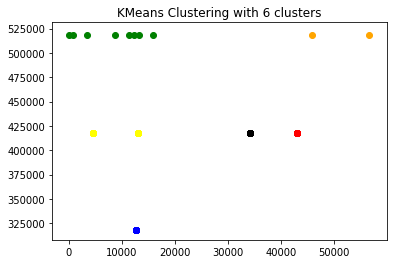

Centers [[1.31210000e+04 4.18192000e+05 1.02222222e+01 7.57777778e+01
  2.32222222e+01 4.40000000e+01 2.67777778e+01 7.74444444e+01
  3.21111111e+01 2.31111111e+01 1.25555556e+01 8.00000000e+00
  1.51000000e+02 5.30000000e+01 1.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.27380000e+04 3.18192000e+05 2.04545455e+01 5.26363636e+01
  8.81818182e+00 1.96363636e+01 2.13636364e+01 8.37272727e+01
  2.30909091e+01 1.90909091e+01 6.00000000e+00 4.45454545e+00
  1.69000000e+02 4.40000000e+01 1.00000000e+00 3.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [8.22862500e+03 5.18192000e+05 3.00000000e+00 7.90000000e+01
  0.00000000e+00 0.00000000e+00 6.73750000e+01 0.00000000e+00
  4.37500000e+01 1.48750000e+01 7.87500000e+00 1.25000000e+01
  1.65625000e+02 7.28750000e+01 7.50000000e-01 1.37500000e+00
  3.75000000e-01 8.75000000e-01 0.00000000e+00 0.00000000e+00]
 [4.30810000e+04 4.18192000e+05 1.02222222e+01 7.91111111e+

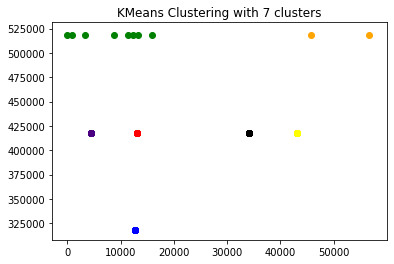

Centers [[1.27380000e+04 3.18192000e+05 2.04545455e+01 5.26363636e+01
  8.81818182e+00 1.96363636e+01 2.13636364e+01 8.37272727e+01
  2.30909091e+01 1.90909091e+01 6.00000000e+00 4.45454545e+00
  1.69000000e+02 4.40000000e+01 1.00000000e+00 3.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.31210000e+04 4.18192000e+05 1.02222222e+01 7.57777778e+01
  2.32222222e+01 4.40000000e+01 2.67777778e+01 7.74444444e+01
  3.21111111e+01 2.31111111e+01 1.25555556e+01 8.00000000e+00
  1.51000000e+02 5.30000000e+01 1.00000000e+00 1.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.23232000e+04 5.18192000e+05 3.00000000e+00 7.70000000e+01
  0.00000000e+00 0.00000000e+00 6.80000000e+01 0.00000000e+00
  4.20000000e+01 1.54000000e+01 7.20000000e+00 1.24000000e+01
  1.66800000e+02 6.92000000e+01 6.00000000e-01 1.20000000e+00
  4.00000000e-01 6.00000000e-01 0.00000000e+00 0.00000000e+00]
 [4.30810000e+04 4.18192000e+05 1.02222222e+01 7.91111111e+

IndexError: list index out of range

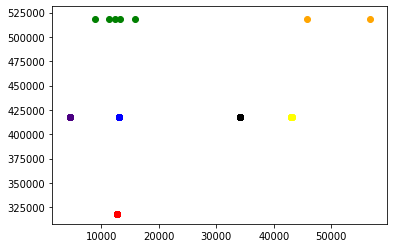

In [409]:
from sklearn.cluster import KMeans
for i in range(2,Gradelen):
    kmeans = KMeans(n_clusters=i)
    y_km = kmeans.fit_predict(kmeans_df)
    print("Centers",kmeans.cluster_centers_)
    distortion.append(kmeans.inertia_)
    print('Silhouette score for {} cluster ='.format(i),silhouette_score(kmeans_df,y_km))
    kmeans_df_array = np.array(kmeans_df)
    for j in range(len(kmeans.cluster_centers_)):
        plt.scatter(kmeans_df_array[y_km==j,0],kmeans_df_array[y_km==j,1],marker='o',c=c[j])
    plt.title('KMeans Clustering with {} clusters'.format(i))
    plt.show()
print('Distortion-->',distortion)

a=np.arange(2,Gradelen)
plt.plot(a,distortion)
plt.grid()
plt.show()

## Applying Agglomerative Clustering

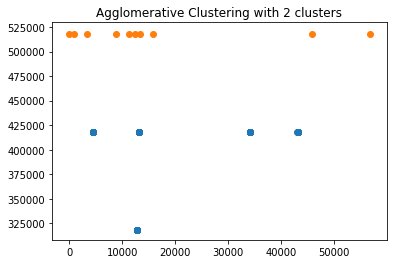

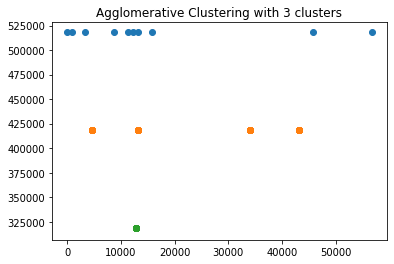

In [410]:
#Agglomerative Clustering technique
from sklearn.cluster import  AgglomerativeClustering
ac_df = df.copy()
ac_df = df.drop(['Regd No','Grade'],axis=1)
for i in range(2,4):
    ac = AgglomerativeClustering(n_clusters=i,affinity='euclidean', linkage='complete')
    labels = ac.fit_predict(ac_df) 
    for j in range(i):
        plt.scatter(ac_df.iloc[labels == j,0], ac_df.iloc[labels == j,1])
        plt.title('Agglomerative Clustering with {} clusters'.format(i))
        plt.plot()
    plt.show()

## DBSCAN CLUSTERING 


In [416]:
from sklearn.cluster import  DBSCAN
db_df = df.copy()
db_df = df.drop(['Regd No','Grade'],axis=1)
for i in range(2,4):
    db = DBSCAN(eps = 0.25)
    labels = db.fit_predict(db_df) 
    for j in range(i):
        plt.scatter(db_df.iloc[labels == j,0], db_df.iloc[labels == j,1])
        plt.title('DBSCAN Clustering with {} clusters'.format(i))
        plt.plot()
    plt.show()

In [242]:
#from sklearn.cluster import KMeans
#km = KMeans(n_clusters=5)
#cluster = km.fit(reduced_data)
#plt.scatter(reduced_data[:, 0], reduced_data[:, 1], label='Datapoints')
#plt.scatter(X.cluster_centers_[:, 0], X.cluster_centers_[:, 1], label='Clusters')
#plt.title("Sklearn version of KMeans")
#plt.legend()
#plt.show()

636189064403426.5
71285885803293.75
37931288152989.64
10776431899720.572
3487059228653.3535
1980830907869.349
1092612021225.2806
662569751172.3367
373335450968.4034


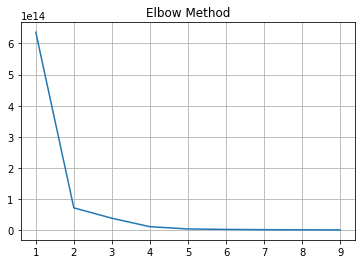

In [382]:
#from sklearn.cluster import KMeans
#import numpy as np

#distortion=[]

#for i in range(1,10,1):
 #   km=KMeans(n_clusters=i)
  #  y_km=km.fit_predict(df)
 #   distortion.append(km.inertia_)
 #   print(km.inertia_)

#a=np.arange(1,10,1)
#plt.plot(a,distortion)
#plt.grid()
#plt.title('Elbow Method')
#plt.show()

In [224]:
#from sklearn.cluster import KMeans
#k=KMeans(n_clusters=4,tol=0.0001)




In [226]:
#k.fit(X)
#clusters = k.labels_.tolist()
#print(clusters)